# Лабораторна робота №3
### Студента групи МІТ-31
### Переверзева Олексія

#### Частина 1: Бінарна класифікація на згенерованому наборі даних

In [237]:
# Згенеруємо набір даних

import pandas as pd
from sklearn.datasets import make_classification as mc

num_samples = 1000 # К-ть прикладів
num_features = 2 # К-ть ознак

X, y = mc(
    n_samples = num_samples,
    n_features = num_features,
    n_informative = 2, # К-ть інформативних ознак
    n_redundant = 0, # К-ть зайвих ознак
    n_classes = 2,  # К-ть классів
    n_clusters_per_class=1, # К-ть кластерів
    random_state = 15 
)

data = pd.DataFrame(X, columns = [f"Feature {i+1}" for i in range(num_features)]) # Створюємо df згідно к-ті ознак
data['Target'] = y

data.to_csv('data_part_1.csv', index=False)

data

,Feature 1,Feature 2,Target
0,0.681638,0.899974,1
1,-1.985948,0.260815,0
2,1.593217,1.272679,1
3,0.371390,1.966326,0
4,-0.181310,1.544739,0
...,...,...,...
995,-1.234707,0.776116,0
996,-2.697055,-0.176247,0
997,-0.373326,-0.281959,1
998,-1.292901,0.836410,0


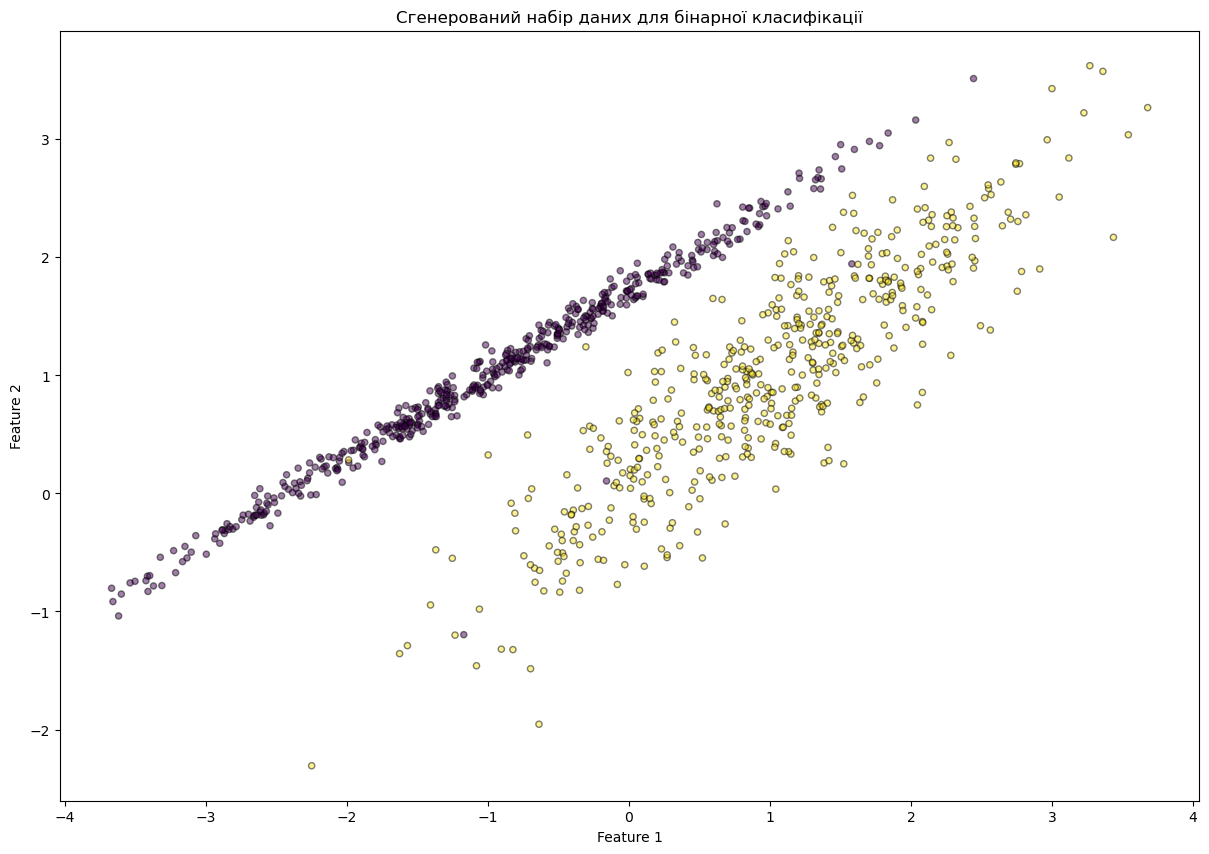

In [238]:
# Відобразимо створений набір даних
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 10))
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.5, edgecolors='k')
plt.title('Сгенерований набір даних для бінарної класифікації')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Text(0, 0.5, 'Feature 2')

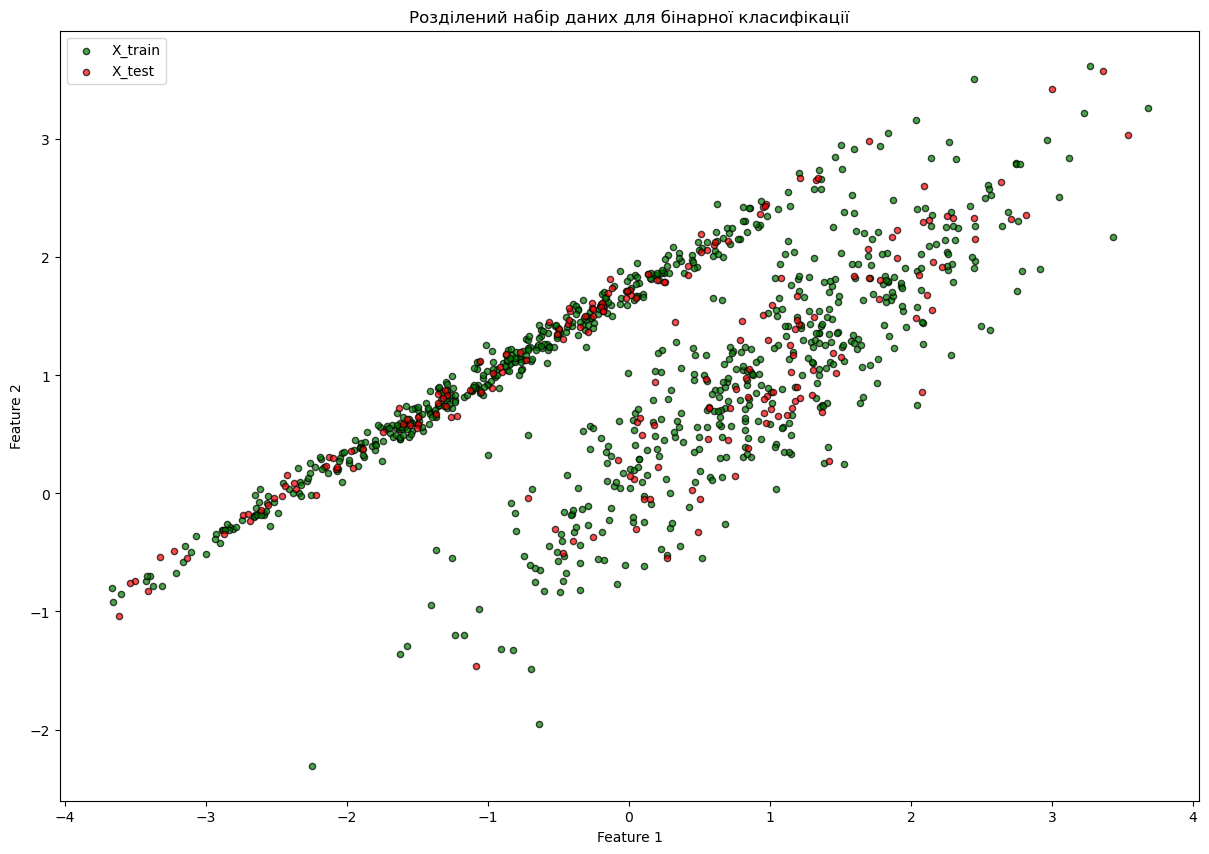

In [239]:
# Розділення даних на навчальний та тестовий набори
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Тренування моделі
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

plt.figure(figsize=(50, 10))
plt.subplot(132)
plt.scatter(X_train[:, 0], X_train[:, 1], s=20, color="green", edgecolors='k', label="X_train", alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], s=20, color="red", edgecolors='k', label="X_test", alpha=0.7)
plt.title('Розділений набір даних для бінарної класифікації')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

Оцінка ефективності класифікатора:
Accuracy:  0.995
Precision:  1.0
Recall:  0.9895833333333334
F1-Score:  0.9947643979057591
AUC-ROC:  1.0

Матриця плутанини:


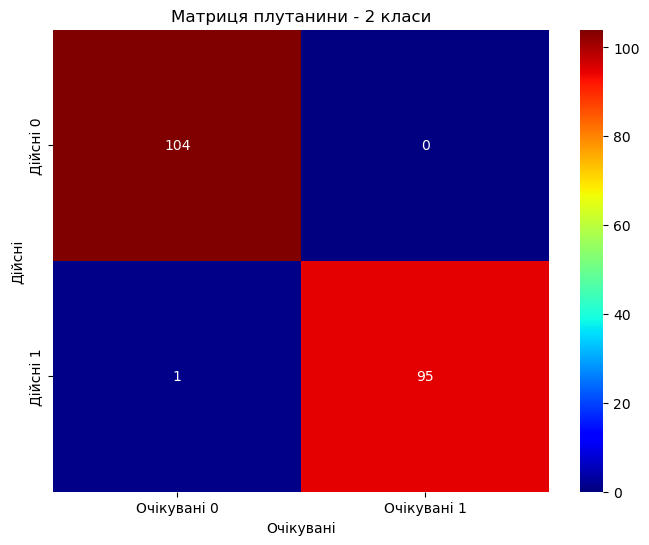


* ROC-крива:


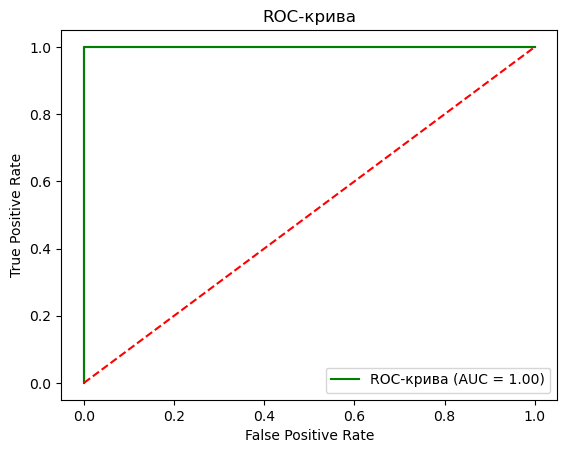

In [240]:
# Оцінимо ефективність класифікатора

y_pred_lr = model_lr.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

print("Оцінка ефективності класифікатора:")
print("Accuracy: ", (accuracy_score(y_test, y_pred_lr)))
print("Precision: ", (precision_score(y_test, y_pred_lr)))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1-Score: ", f1_score(y_test, y_pred_lr))
print("AUC-ROC: ", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1]))

print("\nМатриця плутанини:")
import seaborn as sb
plt.figure(figsize=(8, 6))
sb.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='jet',
            xticklabels=['Очікувані 0', 'Очікувані 1'],
            yticklabels=['Дійсні 0', 'Дійсні 1'])
plt.xlabel('Очікувані')
plt.ylabel('Дійсні')
plt.title('Матриця плутанини - 2 класи')
plt.show()

print("\n* ROC-крива:")

fpr, tpr, thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.title('ROC-крива')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr, color='green', label=f'ROC-крива (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.legend()
plt.show()

#### Частина 2: Мультикласова класифікація на згенерованому наборі даних

In [241]:
num_samples = 1000 
num_features = 2 

X, y = mc(
    n_samples = num_samples,
    n_features = num_features,
    n_informative = 2, 
    n_redundant = 0, 
    n_classes = 4,  
    n_clusters_per_class=1,
    random_state = 15 
)

data = pd.DataFrame(X, columns = [f"Feature {i+1}" for i in range(num_features)]) 
data['Target'] = y

data.to_csv('data_part_2.csv', index=False)

data

,Feature 1,Feature 2,Target
0,-0.466936,1.066595,1
1,-0.057744,-0.215454,1
2,-1.269010,0.909052,1
3,1.419482,-0.096061,3
4,-1.560283,3.718366,1
...,...,...,...
995,0.681529,1.415888,3
996,0.776098,1.332720,3
997,0.790451,1.290018,3
998,-1.221078,-0.654072,0


In [242]:
data['Target'].value_counts() # Кількість прикладів в кожному класі

Target
0    251
3    250
2    250
1    249
Name: count, dtype: int64

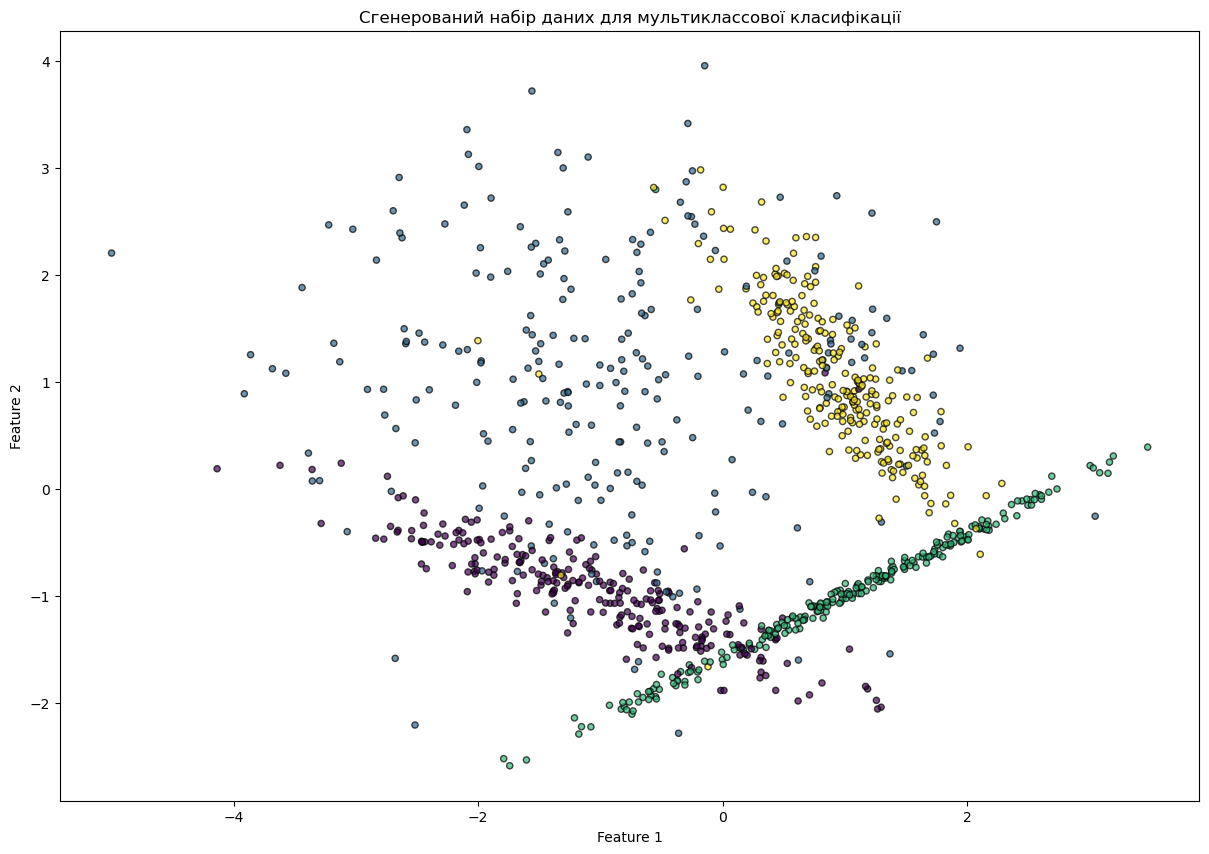

In [243]:
plt.figure(figsize=(50, 10))
plt.subplot(132)
colors = ['Red', 'Yellow', 'Green', 'Blue']
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, alpha=0.7, edgecolors='k')
plt.title('Сгенерований набір даних для мультиклассової класифікації')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Text(0, 0.5, 'Feature 2')

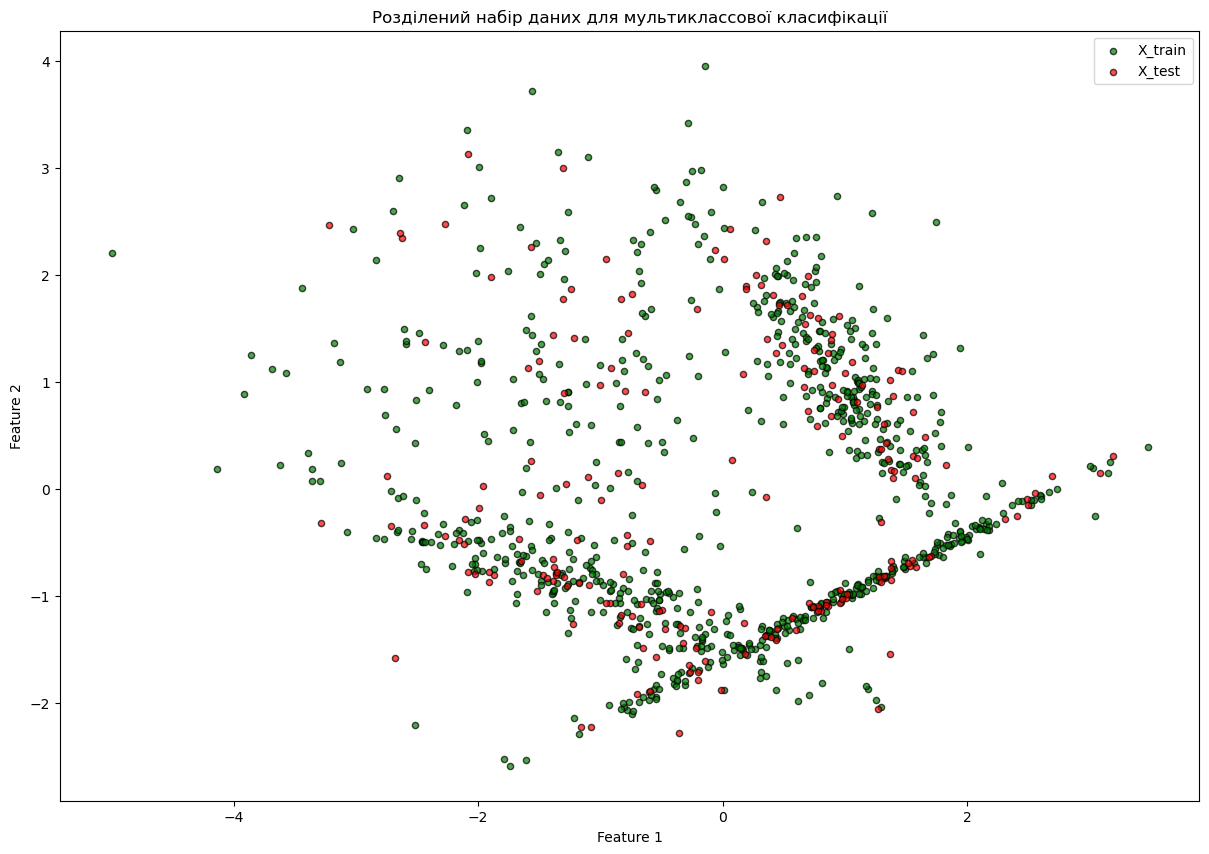

In [244]:
# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

plt.figure(figsize=(50, 10))
plt.subplot(132)
plt.scatter(X_train[:, 0], X_train[:, 1], s=20, color="green", edgecolors='k', label="X_train", alpha=0.7)
plt.scatter(X_test[:, 0], X_test[:, 1], s=20, color="red", edgecolors='k', label="X_test", alpha=0.7)
plt.title('Розділений набір даних для мультиклассової класифікації')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [245]:
# Створимо функцію для обчислення ефективності класифікаторів, щоб не дублювати код

def metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Оцінка ефективності класифікатора {type(model).__name__}:")
    print("Accuracy: ", (accuracy_score(y_test, y_pred)))
    print("Precision: ", (precision_score(y_test, y_pred, average='weighted')))
    print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score: ", f1_score(y_test, y_pred, average='weighted'))

    print("\nМатриця плутанини:")
    plt.figure(figsize=(8, 6))
    sb.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='jet',
            xticklabels=['Очікувані 0', 'Очікувані 1', 'Очікувані 2', 'Очікувані 3'],
            yticklabels=['Дійсні 0', 'Дійсні 1', 'Дійсні 2', 'Дійсні 3'])
    plt.xlabel('Очікувані')
    plt.ylabel('Дійсні')
    plt.title('Матриця плутанини - 4 класи')
    plt.show()

SVC

Оцінка ефективності класифікатора SVC:
Accuracy:  0.87
Precision:  0.8860220162998295
Recall:  0.87
F1-Score:  0.8648141155141156

Матриця плутанини:


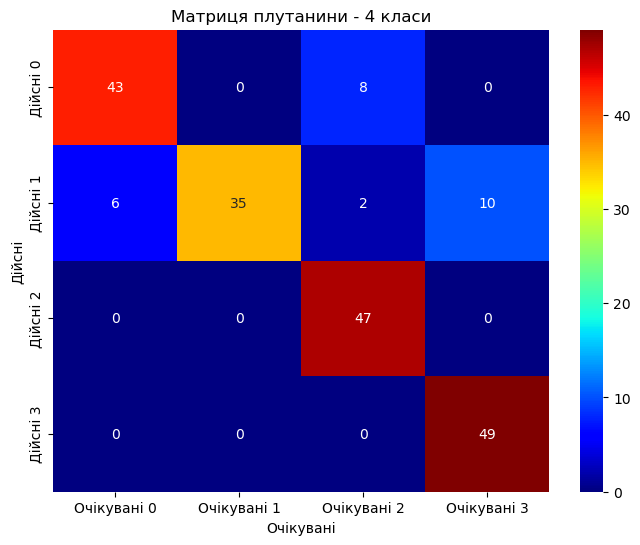

In [246]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)

metrics(model_svc, X_test, y_test)

RandomForestClassifier

Оцінка ефективності класифікатора RandomForestClassifier:
Accuracy:  0.91
Precision:  0.9126633574667252
Recall:  0.91
F1-Score:  0.9077968960863697

Матриця плутанини:


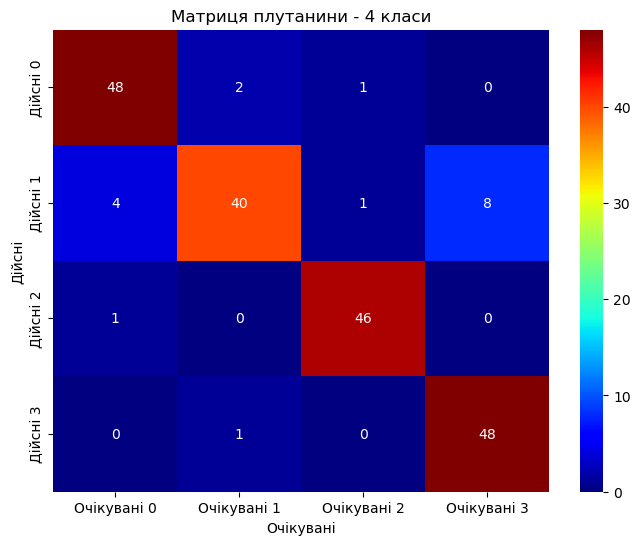

In [247]:
from sklearn.ensemble import RandomForestClassifier as rfc
model_rfc = rfc(random_state=13)
model_rfc.fit(X_train, y_train)

metrics(model_rfc, X_test, y_test)

LogisticRegression

Оцінка ефективності класифікатора LogisticRegression:
Accuracy:  0.845
Precision:  0.8584662698412697
Recall:  0.845
F1-Score:  0.8410829138004494

Матриця плутанини:


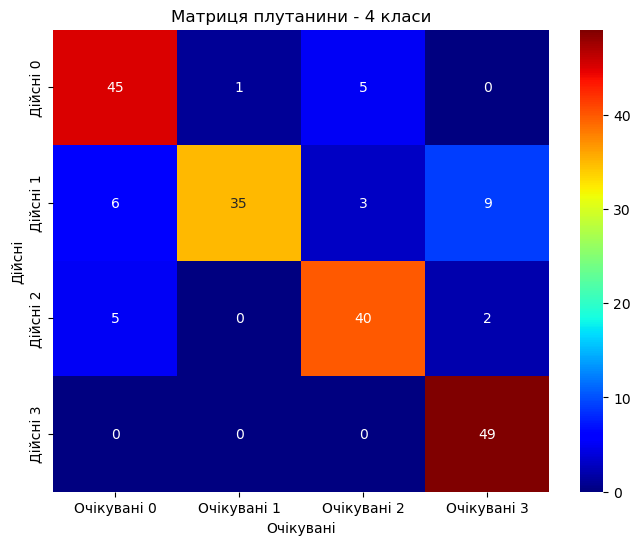

In [248]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

metrics(model_lr, X_test, y_test)

Висновки: за результатами виконання мультиклассової класифікації можна побачити, що RandomForestClassifier має кращі результати ніж SVC і LogisticRegression, хоча в цілому оцінка метрик непоганою є для всіх троьх.

#### Частина 3: Мультилейбл класифікація на реальному наборі даних з Інтернету

Завантажимо реальний набір даних для мультилейбл класифікації на веб-сайті Kaggle

Billionaires Statistics Dataset (2023): https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

In [249]:
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('always')

data = pd.read_csv('Billionaires Statistics Dataset.csv')

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

data.fillna(data.mean(), inplace=True)

X = data[['gender', 'age', 'finalWorth', 'status']]
y = data[['country', 'category', 'selfMade']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
model = MultiOutputClassifier(RandomForestClassifier(random_state=13))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    print("\nОцінка ефективності для '{}':".format(label))
    print("Accuracy: ", accuracy_score(y_test[label], y_pred[:, i]))
    print("Precision: ", precision_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0))
    print("Recall: ", recall_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0))
    print("F1-Score: ", f1_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
)


Оцінка ефективності для 'country':
Accuracy:  0.2556818181818182
Precision:  0.2132134143437335
Recall:  0.2556818181818182
F1-Score:  0.23047039321696736

Оцінка ефективності для 'category':
Accuracy:  0.1590909090909091
Precision:  0.154995834237959
Recall:  0.1590909090909091
F1-Score:  0.15544060078627644

Оцінка ефективності для 'selfMade':
Accuracy:  0.7064393939393939
Precision:  0.6884738933452168
Recall:  0.7064393939393939
F1-Score:  0.693804954022974


Висновки:
    Згідно оцінкам метрики для label "country", так і для "industries" можна стверджувати що модель не здатна збалансувати точність і відгук для цієї мітки, але label "selfMade" показує найкращу продуктивність, що вказує на те що модель досить добре прогнозує випадки, повєязані з "selfMade". Покращити результати можна, провівши глибший аналіз даних для виявлення шаблонів для вдосконалення, підібрати кращу комбінацію даних, вибрати інший алгоритм тощо.